In [1]:
import os
import jieba
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt  #绘制图像的模块

In [2]:
dataset=pd.read_csv("评论/去非中英文符号/麻雀评论2.csv",encoding='utf-8-sig',header=None)
dataset.columns = ['name', 'id', 'comment', 'time']
dataset

,name,id,comment,time
0,ititcurry,250248804,同年高考 一起加油,2019-12-19 22:47:23
1,热爱奋斗,355814609,怎么有一些歌就是刚听觉得一般，听多几遍就会觉得 哎哟 不错哦！,2019-12-19 22:47:11
2,大衿8,564623796,分享一个小众文艺的众号 Blue Afternoon 给 泥萌,2019-12-19 22:47:10
3,ukumiao,328679858,你飞吧，我真的很喜欢人间,2019-12-19 22:47:06
4,如此多娇Sunny,1530251108,高考加油！,2019-12-19 22:46:56
5,御闻舟,438007008,我我我，试试 多多大哭,2019-12-19 22:46:50
6,久宅臂弯,403765382,天会晴就会暗，你从未得知我遭遇的那些苦难。,2019-12-19 22:46:48
7,起名好难呐,1679847893,很喜欢,2019-12-19 22:46:37
8,赤州中正--Desh帝史,1490860250,爱了，爱了，爱了，单曲循环,2019-12-19 22:46:37
9,單城府丶190623,1891096556,签到。,2019-12-19 22:46:19


In [3]:
len(dataset)

5020

In [4]:
f=''
for i in range(len(dataset)):
    f=f+dataset['comment'][i]
f

'同年高考 一起加油怎么有一些歌就是刚听觉得一般，听多几遍就会觉得 哎哟 不错哦！分享一个小众文艺的众号 Blue Afternoon 给 泥萌你飞吧，我真的很喜欢人间高考加油！我我我，试试 多多大哭 天会晴就会暗，你从未得知我遭遇的那些苦难。很喜欢爱了，爱了，爱了，单曲循环 签到。哇塞，看到荣浩亲自回评论哦，希望被翻到 西西机智 日子总会好起来的，只要我们去认真对待，加油吧，不为别人，为自己为过一个简单而又快乐寒假而努力，加油什么？老大，好想得到你的一句祝福 20年高考加油那只鲸叫Alice，但是科学家已经治好了她的病，她也可以和同类交流了呢。荣浩大哥也太强了 这么宠粉嘛加油加油哦，陌生人，你会成功的哦，我也在路上曾也想飞上雪山之颠 却忘记是只麻雀额，我想起了狂浪哈哈哈哈哈哈哈独身在异地，总感觉  写给李荣浩 是我为你写的歌。因为你，我开始自学编曲，吉他，这首歌向你致敬。我也许永远只是一只小麻雀，但是能追随这么优秀的老大，值了。我未来会像你一样写出更多治愈人心的歌。鲸鱼好爱你李荣浩 全世界爱你老李超喜欢荣浩哥，13年开始哒，希望浩哥多发新歌哈哈，加油哦嗯抱抱唔，谢谢你阿西这里一串李荣浩的回复麻雀也有明天 大笑 大笑 大笑 爱了水手同是寒窗苦读，怎愿甘拜下风麻雀的故事麻雀了！一样刚分手不到五天你知道吗？这世上曾经有一条鲸鱼，生了一种疾病，它永远也发不出正常鲸鱼的声音频率，它叫 的每一声都无法被同伴听见，从此就和别的鲸鱼失去了联系。可是它并不知道自己有问题，所以 一直到死之前，它都拼命的在海中呼唤着，直到最后，都没有一条鲸鱼理睬它。于是它就这样， 在孤独的大海里，绝望而痛加油！能考进年级前三就非常棒啦！只能说一个好听！李荣浩是什么大宝藏那请问您是用什么发的消息呢？你可以活自己想要的任何样子，他人的眼光真的那么重要吗。加油 加油！听着周杰伦的歌长大 长大后却喜欢上了李荣浩这不是孤独，这是自由。沉迷学习 逢考必过头都差点挤破了加油，共勉！后天要考研了，自己一定要坚持住！记住自己是努力过的。加油 加油读书丫云村的朋友们，有朋友愿意帮助我一次吗，一天没吃东西了三十就行了，现在真的很潦倒，生而为人，真的很抱歉...炒鸡稀饭但凡你能给我点回应，那最后一块甲板又能算得上什么。可你是你，我是我，我也没能赢得那张船票。不自由毋宁死学习真的好累呀，还有18天期末考啦 看到的陌生人能不能给

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.779 seconds.
Prefix dict has been built succesfully.


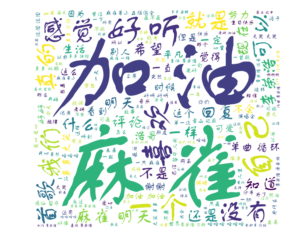

In [5]:

# path_txt='C://Users/Administrator/Desktop/all.txt'
# f = open(path_txt,'r',encoding='UTF-8').read()

# 结巴分词，生成字符串，wordcloud无法直接生成正确的中文词云
cut_text = " ".join(jieba.cut(f))

wordcloud = WordCloud(
   #设置字体，不然会出现口字乱码，文字的路径是电脑的字体一般路径，可以换成别的
   font_path="C:/Windows/Fonts/FZSTK.TTF",
   #设置了背景，宽高
   background_color="white",width=1000,height=880).generate(cut_text)
wordcloud.to_file('评论/词云/麻雀.png')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
# CURDIR = os.path.abspath(os.path.dirname(__file__))
# TEXT = os.path.join(CURDIR,  'comments.txt')
# PICTURE= os.path.join(CURDIR,  'alice.png')
# FONT = os.path.join(CURDIR, 'Songti.ttc')
# FONT="C:/Windows/Fonts/FZSTK.TTF"

# def cut_the_words(test=TEXT):
# #     with open(test, 'r') as rp:
# #         content = rp.read()
#     words_list = jieba.cut(content, cut_all = True)
#     return ' '.join(words_list)


# def create_worlds_cloud():
# #     background = np.array(Image.open(PICTURE))
#     stopwords = set(STOPWORDS)
# #     for item in ["上海堡垒", "上海", "堡垒"]:
# #         stopwords.add(item)
#     words = cut_the_words()
#     wc = WordCloud(background_color="white",
#                    mask=background,
#                    stopwords=stopwords,
#                    font_path=FONT)
#     wc.generate(words)
#     wc.to_file('girl.png')

# if __name__ == '__main__':
#     create_worlds_cloud()